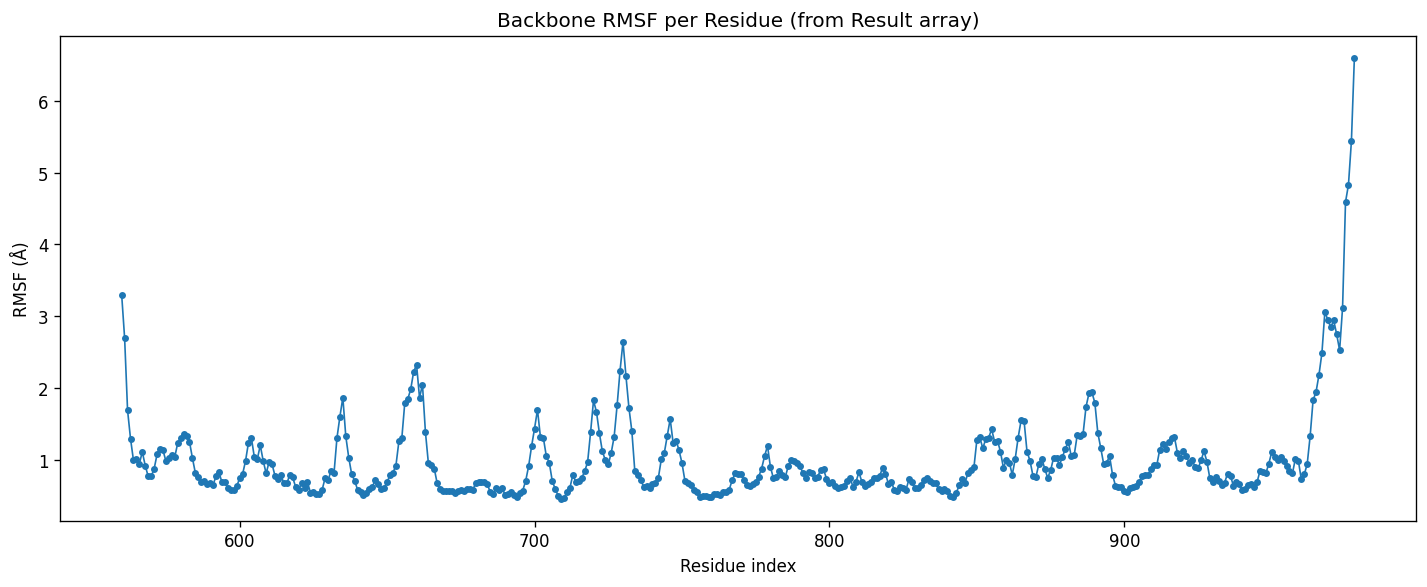

Residues: 419 | mean ± sd = 0.989 ± 0.640 Å
Residue 892: RMSF = 1.163 Å
Residue 910: RMSF = 0.923 Å


In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# === path to your RMSF output file ===
PATH = "6W3C_dephos_RMSF_50ns_backbone.csv"

# read file as text
with open(PATH, "r", encoding="utf-8", errors="ignore") as f:
    txt = f.read()

# extract the RMSF values from the Result line
m_val = re.search(r'Result\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
if not m_val:
    raise ValueError("Could not find 'Result = [...]' in the file!")

start_res = 560
vals = [float(x) for x in m_val.group(1).split() if x]

# put into DataFrame
df = pd.DataFrame({
    "residue_index": range(start_res, len(vals)+start_res),
    "rmsf_A": vals
})

# plot
plt.figure(figsize=(12,5), dpi=120)
plt.plot(df["residue_index"], df["rmsf_A"], linewidth=1)
plt.scatter(df["residue_index"], df["rmsf_A"], s=10)
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title("Backbone RMSF per Residue (from Result array)")
plt.tight_layout()
plt.show()

print(f"Residues: {len(df)} | mean ± sd = {df['rmsf_A'].mean():.3f} ± {df['rmsf_A'].std(ddof=1):.3f} Å")

for res in [892, 910]:
    if res in df["residue_index"].values:
        val = df.loc[df["residue_index"] == res, "rmsf_A"].values[0]
        print(f"Residue {res}: RMSF = {val:.3f} Å")
    else:
        print(f"Residue {res} not found in data (valid range {df['residue_index'].min()}–{df['residue_index'].max()})")

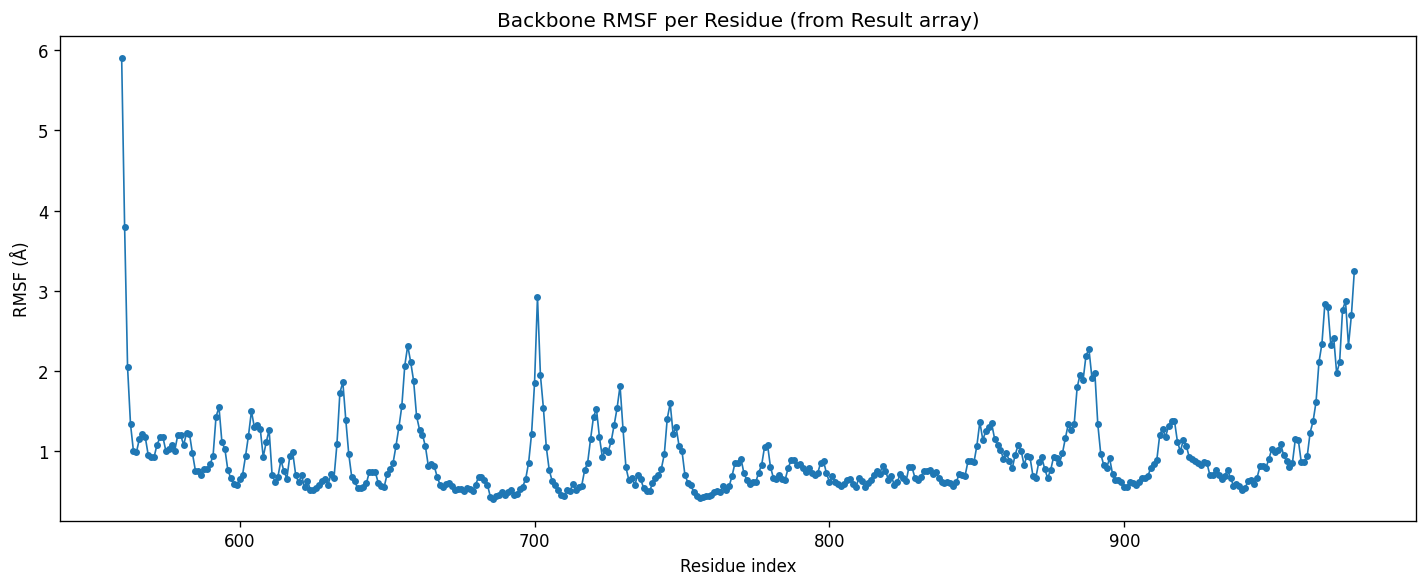

Residues: 419 | mean ± sd = 0.943 ± 0.542 Å
Residue 892: RMSF = 0.968 Å
Residue 910: RMSF = 0.838 Å


In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# === path to your RMSF output file ===
PATH = "6W3C_phos_RMSF_50ns_backbone.csv"

# read file as text
with open(PATH, "r", encoding="utf-8", errors="ignore") as f:
    txt = f.read()

# extract the RMSF values from the Result line
m_val = re.search(r'Result\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
if not m_val:
    raise ValueError("Could not find 'Result = [...]' in the file!")

start_res = 560
vals = [float(x) for x in m_val.group(1).split() if x]

# put into DataFrame
df = pd.DataFrame({
    "residue_index": range(start_res, len(vals)+start_res),
    "rmsf_A": vals
})

# plot
plt.figure(figsize=(12,5), dpi=120)
plt.plot(df["residue_index"], df["rmsf_A"], linewidth=1)
plt.scatter(df["residue_index"], df["rmsf_A"], s=10)
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title("Backbone RMSF per Residue (from Result array)")
plt.tight_layout()
plt.show()

print(f"Residues: {len(df)} | mean ± sd = {df['rmsf_A'].mean():.3f} ± {df['rmsf_A'].std(ddof=1):.3f} Å")

for res in [892, 910]:
    if res in df["residue_index"].values:
        val = df.loc[df["residue_index"] == res, "rmsf_A"].values[0]
        print(f"Residue {res}: RMSF = {val:.3f} Å")
    else:
        print(f"Residue {res} not found in data (valid range {df['residue_index'].min()}–{df['residue_index'].max()})")

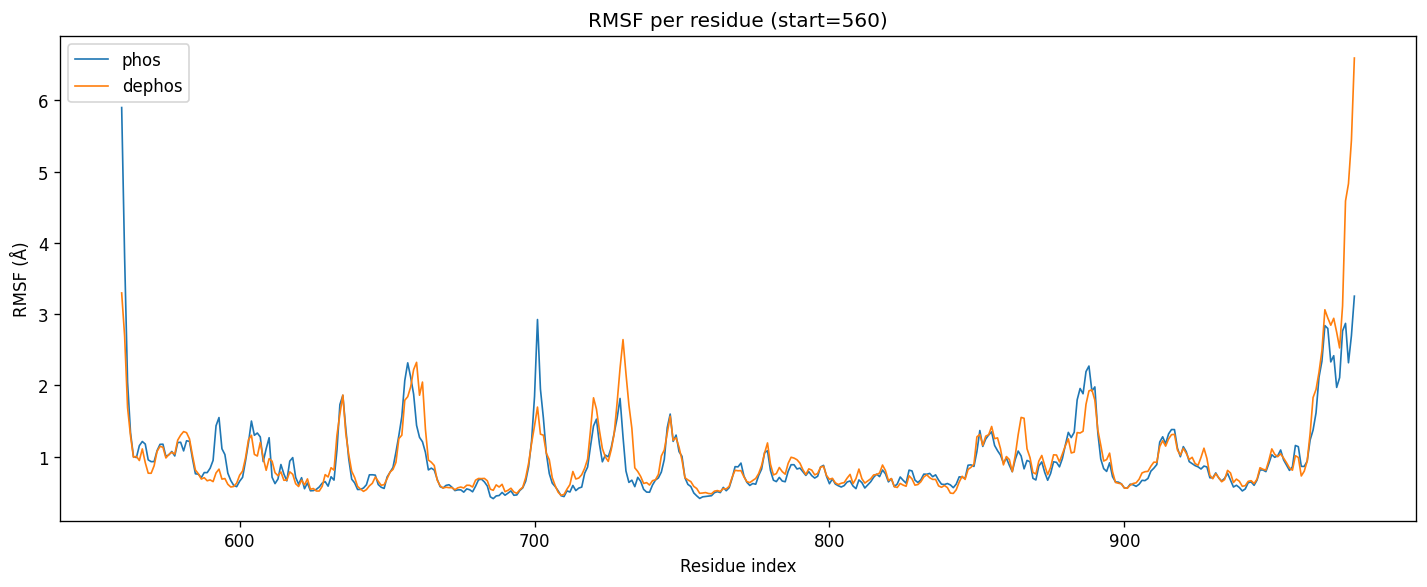

phos: residues 560–978 | mean ± sd = 0.943 ± 0.542 Å
dephos: residues 560–978 | mean ± sd = 0.989 ± 0.640 Å


In [6]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== EDIT THESE ====
PATH1 = "6W3C_phos_RMSF_50ns_backbone.csv"   # first RMSF file
PATH2 = "6W3C_dephos_RMSF_50ns_backbone.csv"   # second RMSF file
LABEL1 = "phos"
LABEL2 = "dephos"
START_RES = 560                  # residue index to start from (e.g., 560)
USE_RESNAME_TICKS = False        # True = use residue names on x-axis (sparse ticks)

def parse_rmsf_file(path):
    """Return (vals, labels) where vals are RMSF (Å), labels are optional residue strings."""
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        txt = f.read()

    # Always use RMSF values from 'Result = [ ... ]'
    m_val = re.search(r'\bResult\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
    if not m_val:
        raise ValueError(f"Could not find 'Result = [ ... ]' in {path}")
    vals = [float(x) for x in m_val.group(1).split() if x]

    # Try to extract residue labels if present (ProteinResidues = ["A:GLU_560", ...])
    m_res = re.search(r'ProteinResidues\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
    labels = []
    if m_res:
        tokens = re.findall(r'"([^"]+)"', m_res.group(1))
        # Clean: "A:GLU_560" -> "GLU560" (drop chain, remove underscore)
        if len(tokens) == len(vals):
            labels = [t.replace("A:", "").replace("_", "") for t in tokens]

    return np.array(vals, dtype=float), labels

# Parse both files
vals1, labels1 = parse_rmsf_file(PATH1)
vals2, labels2 = parse_rmsf_file(PATH2)

# Align lengths (truncate to min if different)
n = min(len(vals1), len(vals2))
vals1 = vals1[:n]
vals2 = vals2[:n]
res_indices = np.arange(START_RES, START_RES + n)

# Build DataFrames (optional; handy if you want to save)
df1 = pd.DataFrame({"residue_index": res_indices, "rmsf_A": vals1})
df2 = pd.DataFrame({"residue_index": res_indices, "rmsf_A": vals2})

# Plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 120

plt.figure()
plt.plot(df1["residue_index"], df1["rmsf_A"], linewidth=1, label=LABEL1)
plt.plot(df2["residue_index"], df2["rmsf_A"], linewidth=1, label=LABEL2)
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title(f"RMSF per residue (start={START_RES})")
plt.legend()
plt.tight_layout()

# Optional: use residue names as sparse x-ticks (only if present and requested)
if USE_RESNAME_TICKS:
    # Prefer labels from file 1 if available; otherwise from file 2
    active_labels = labels1 if labels1 and len(labels1) >= n else (labels2 if labels2 and len(labels2) >= n else [])
    if active_labels:
        # sparse ticks (<= 40 labels)
        stride = max(1, n // 40)
        xticks = res_indices[::stride]
        xlabels = [active_labels[i].replace("A:", "") for i in range(0, n, stride)]
        plt.xticks(xticks, xlabels, rotation=90)
        plt.xlabel("Residue")

plt.show()

# Quick stats
print(f"{LABEL1}: residues {res_indices[0]}–{res_indices[-1]} | mean ± sd = {df1['rmsf_A'].mean():.3f} ± {df1['rmsf_A'].std(ddof=1):.3f} Å")
print(f"{LABEL2}: residues {res_indices[0]}–{res_indices[-1]} | mean ± sd = {df2['rmsf_A'].mean():.3f} ± {df2['rmsf_A'].std(ddof=1):.3f} Å")

# Optional: save combined table
# out = pd.DataFrame({
#     "residue_index": res_indices,
#     f"RMSF_{LABEL1}": vals1,
#     f"RMSF_{LABEL2}": vals2
# })
# out.to_csv("rmsf_compare.csv", index=False)


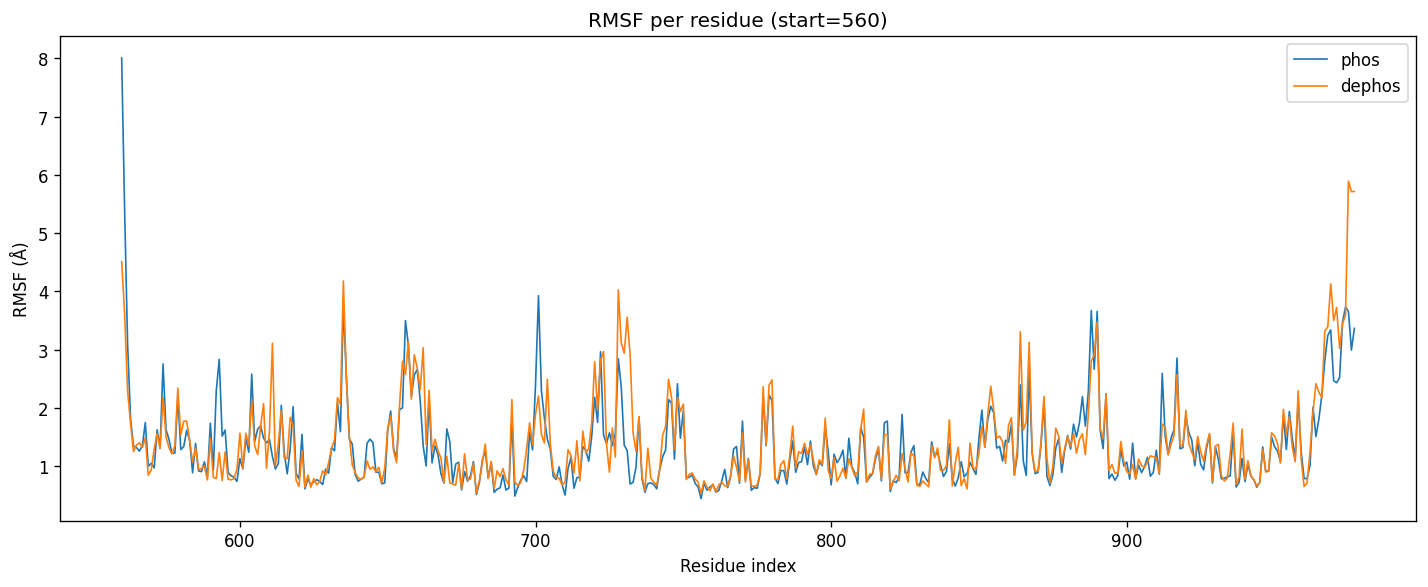

phos: residues 560–977 | mean ± sd = 1.340 ± 0.760 Å
dephos: residues 560–977 | mean ± sd = 1.403 ± 0.802 Å


In [7]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== EDIT THESE ====
PATH1 = "6W3C_phos_RMSF_50ns_sidechain.csv"   # first RMSF file
PATH2 = "6W3C_dephos_RMSF_50ns_sidechain.csv"   # second RMSF file
LABEL1 = "phos"
LABEL2 = "dephos"
START_RES = 560                  # residue index to start from (e.g., 560)
USE_RESNAME_TICKS = False        # True = use residue names on x-axis (sparse ticks)

def parse_rmsf_file(path):
    """Return (vals, labels) where vals are RMSF (Å), labels are optional residue strings."""
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        txt = f.read()

    # Always use RMSF values from 'Result = [ ... ]'
    m_val = re.search(r'\bResult\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
    if not m_val:
        raise ValueError(f"Could not find 'Result = [ ... ]' in {path}")
    vals = [float(x) for x in m_val.group(1).split() if x]

    # Try to extract residue labels if present (ProteinResidues = ["A:GLU_560", ...])
    m_res = re.search(r'ProteinResidues\s*=\s*\[([^\]]+)\]', txt, flags=re.DOTALL)
    labels = []
    if m_res:
        tokens = re.findall(r'"([^"]+)"', m_res.group(1))
        # Clean: "A:GLU_560" -> "GLU560" (drop chain, remove underscore)
        if len(tokens) == len(vals):
            labels = [t.replace("A:", "").replace("_", "") for t in tokens]

    return np.array(vals, dtype=float), labels

# Parse both files
vals1, labels1 = parse_rmsf_file(PATH1)
vals2, labels2 = parse_rmsf_file(PATH2)

# Align lengths (truncate to min if different)
n = min(len(vals1), len(vals2))
vals1 = vals1[:n]
vals2 = vals2[:n]
res_indices = np.arange(START_RES, START_RES + n)

# Build DataFrames (optional; handy if you want to save)
df1 = pd.DataFrame({"residue_index": res_indices, "rmsf_A": vals1})
df2 = pd.DataFrame({"residue_index": res_indices, "rmsf_A": vals2})

# Plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 120

plt.figure()
plt.plot(df1["residue_index"], df1["rmsf_A"], linewidth=1, label=LABEL1)
plt.plot(df2["residue_index"], df2["rmsf_A"], linewidth=1, label=LABEL2)
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title(f"RMSF per residue (start={START_RES})")
plt.legend()
plt.tight_layout()

# Optional: use residue names as sparse x-ticks (only if present and requested)
if USE_RESNAME_TICKS:
    # Prefer labels from file 1 if available; otherwise from file 2
    active_labels = labels1 if labels1 and len(labels1) >= n else (labels2 if labels2 and len(labels2) >= n else [])
    if active_labels:
        # sparse ticks (<= 40 labels)
        stride = max(1, n // 40)
        xticks = res_indices[::stride]
        xlabels = [active_labels[i].replace("A:", "") for i in range(0, n, stride)]
        plt.xticks(xticks, xlabels, rotation=90)
        plt.xlabel("Residue")

plt.show()

# Quick stats
print(f"{LABEL1}: residues {res_indices[0]}–{res_indices[-1]} | mean ± sd = {df1['rmsf_A'].mean():.3f} ± {df1['rmsf_A'].std(ddof=1):.3f} Å")
print(f"{LABEL2}: residues {res_indices[0]}–{res_indices[-1]} | mean ± sd = {df2['rmsf_A'].mean():.3f} ± {df2['rmsf_A'].std(ddof=1):.3f} Å")

# Optional: save combined table
# out = pd.DataFrame({
#     "residue_index": res_indices,
#     f"RMSF_{LABEL1}": vals1,
#     f"RMSF_{LABEL2}": vals2
# })
# out.to_csv("rmsf_compare.csv", index=False)
